In [5]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score

import pandas as pd

In [ ]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']
X = pd.read_csv(r"C:\Users\divyakamat\PG_AI_ML\python\project\module_3\pima-indians-diabetes.data", names=columns)
y = X.pop("Outcome")

In [ ]:
X.describe()

In [31]:
numeric_variables= list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [32]:
model = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=42)
model.fit(X[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [33]:
model.oob_score_

0.2908052108046283

In [34]:
y_oob = model.oob_prediction_
print("roc_auc_score",roc_auc_score(y,y_oob))

roc_auc_score 0.8232014925373135


In [35]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [38]:
#describe_categorical(X)

In [39]:
def clean_cabin(X):
    try:
        return x[0]
    except TypeError:
        return "None"
    
#X["Cabin"] = X.Cabin.apply(clean_cabin)

In [44]:
def printall(X,max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
printall(X)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [45]:
model.feature_importances_

array([0.06852812, 0.32338867, 0.08433397, 0.04936702, 0.05215214,
       0.17786659, 0.12524086, 0.11912263])

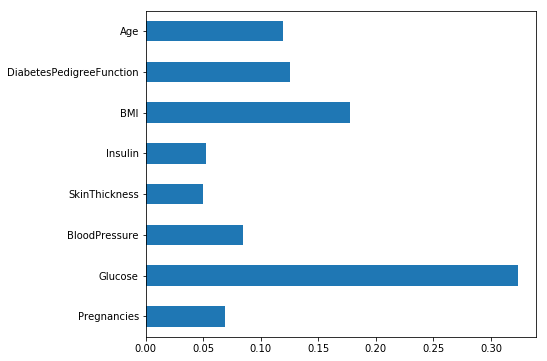

In [51]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh',figsize=[7,6])

In [52]:
n_estimator_options = [30,50,100,200,500,1000,2000]
max_features = ['auto',None,"sqrt","log2",0.9,0.2]
max_leaf = [1,2,3,4,5,6,7,8,9,10]